In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("vehicle_performance_pred.csv")
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [3]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [6]:
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

In [7]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [8]:
num_var=df.select_dtypes(include=['int64','int32','float32','float64'])
num_var

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,3504,12.0,1970,7.652587
1,1,8,350.0,3693,11.5,1970,6.377156
2,1,8,318.0,3436,11.0,1970,7.652587
3,1,8,304.0,3433,12.0,1970,6.802299
4,1,8,302.0,3449,10.5,1970,7.227443
...,...,...,...,...,...,...,...
393,1,4,140.0,2790,15.6,1982,11.478880
394,2,4,97.0,2130,24.6,1982,18.706323
395,1,4,135.0,2295,11.6,1982,13.604599
396,1,4,120.0,2625,18.6,1982,11.904024


In [9]:
obj_var=df.select_dtypes(include='O')
obj_var

,horsepower,name
0,130,chevrolet chevelle malibu
1,165,buick skylark 320
2,150,plymouth satellite
3,150,amc rebel sst
4,140,ford torino
...,...,...
393,86,ford mustang gl
394,52,vw pickup
395,84,dodge rampage
396,79,ford ranger


In [10]:
obj_var['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
df[df['horsepower']=='?']

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
32,1,4,98.0,?,2046,19.0,1971,ford pinto,10.628593
126,1,6,200.0,?,2875,17.0,1974,ford maverick,8.928018
330,2,4,85.0,?,1835,17.3,1980,renault lecar deluxe,17.388378
336,1,4,140.0,?,2905,14.3,1980,ford mustang cobra,10.033391
354,2,4,100.0,?,2320,15.8,1981,renault 18i,14.667458
374,1,4,151.0,?,3035,20.5,1982,amc concord dl,9.778305


In [12]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [13]:
df['horsepower']=df['horsepower'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           392 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [14]:
df.isnull().sum()/len(df)*100

origin                 0.000000
cylinders              0.000000
displacement           0.000000
horsepower             1.507538
weight                 0.000000
acceleration           0.000000
year                   0.000000
name                   0.000000
Kilometer_per_liter    0.000000
dtype: float64

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()/len(df)*100

origin                 0.0
cylinders              0.0
displacement           0.0
horsepower             0.0
weight                 0.0
acceleration           0.0
year                   0.0
name                   0.0
Kilometer_per_liter    0.0
dtype: float64

<AxesSubplot:>

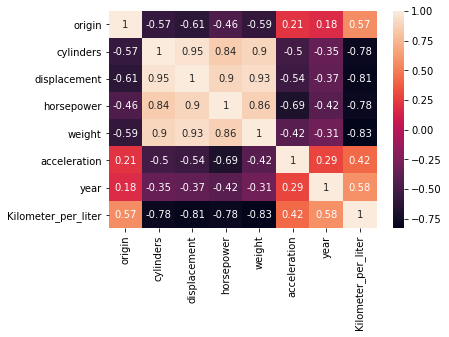

In [17]:
sns.heatmap(data=df.corr(),annot=True)

displacement and cylinders are highly correlated to each other.
displacement and weight are highly correlated to each other.

<AxesSubplot:xlabel='displacement', ylabel='cylinders'>

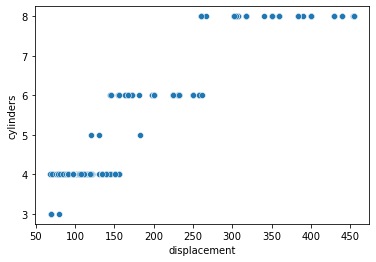

In [18]:
sns.scatterplot(x=df['displacement'], y=df['cylinders'])

<AxesSubplot:xlabel='displacement', ylabel='weight'>

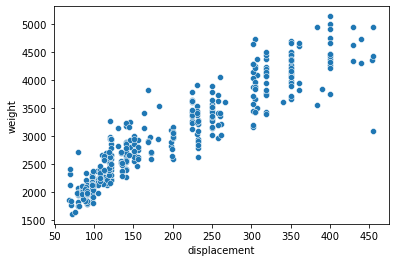

In [19]:
sns.scatterplot(x=df['displacement'], y=df['weight'])

<AxesSubplot:xlabel='weight', ylabel='cylinders'>

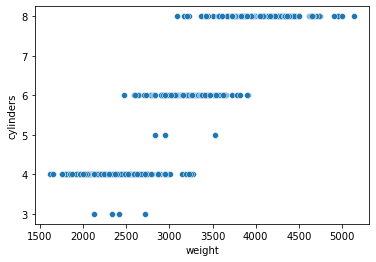

In [20]:
sns.scatterplot(x=df['weight'], y=df['cylinders'])

<AxesSubplot:xlabel='weight', ylabel='horsepower'>

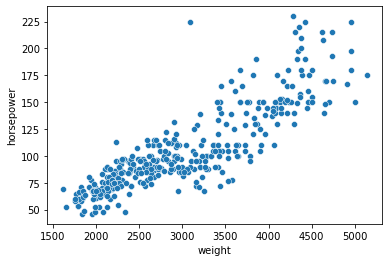

In [21]:
sns.scatterplot(x=df['weight'], y=df['horsepower'])

<AxesSubplot:xlabel='weight', ylabel='horsepower'>

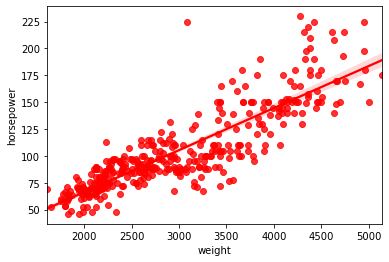

In [22]:
sns.regplot(x=df['weight'], y=df['horsepower'], color='red')

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='horsepower'>

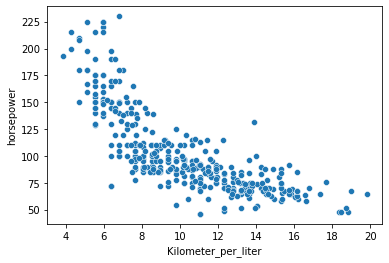

In [23]:
sns.scatterplot(x=df['Kilometer_per_liter'], y=df['horsepower'])

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='acceleration'>

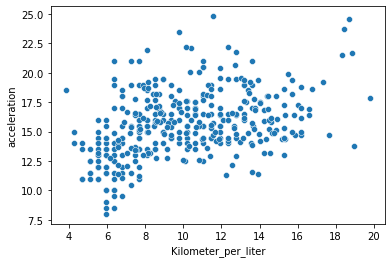

In [24]:
sns.scatterplot(x=df['Kilometer_per_liter'], y=df['acceleration'])

In [25]:
X=df.iloc[:,:-2]
X

,origin,cylinders,displacement,horsepower,weight,acceleration,year
0,1,8,307.0,130.0,3504,12.0,1970
1,1,8,350.0,165.0,3693,11.5,1970
2,1,8,318.0,150.0,3436,11.0,1970
3,1,8,304.0,150.0,3433,12.0,1970
4,1,8,302.0,140.0,3449,10.5,1970
...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982
394,2,4,97.0,52.0,2130,24.6,1982
395,1,4,135.0,84.0,2295,11.6,1982
396,1,4,120.0,79.0,2625,18.6,1982


In [26]:
y=df.iloc[:,-1]
y

0       7.652587
1       6.377156
2       7.652587
3       6.802299
4       7.227443
         ...    
393    11.478880
394    18.706323
395    13.604599
396    11.904024
397    13.179455
Name: Kilometer_per_liter, Length: 392, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.20,random_state=145)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_train,y_train_pred)
print("RMSE:",np.sqrt(mse))
print("R2:",r2_score(y_train,y_train_pred))

RMSE: 1.4029249607422236
R2: 0.8159708894406803


In [34]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred)))
print("R2:",r2_score(y_test,y_test_pred))

RMSE: 1.3970621348865297
R2: 0.8337122853190327


In [35]:
from sklearn.linear_model import Lasso, Ridge

In [58]:
r1=Ridge(alpha=1)
r1.fit(X_train, y_train)
y_pred_train_r=r1.predict(X_train)
y_pred_test_r=r1.predict(X_test)

In [59]:
l1=Lasso(alpha=1)
l1.fit(X_train,y_train)
y_pred_train_l=l1.predict(X_train)
y_pred_test_l=l1.predict(X_test)

In [60]:
def metrics(y_act,y_pred):
    print("RMSE:",np.sqrt(mean_squared_error(y_act,y_pred)))
    print("R2_score:",r2_score(y_act,y_pred))

In [61]:
metrics(y_train,y_pred_train_r)

RMSE: 1.4029303914621993
R2_score: 0.8159694646852169


In [62]:
metrics(y_train,y_pred_train_l)

RMSE: 1.4885199098808002
R2_score: 0.7928299653798865


In [63]:
metrics(y_test,y_pred_test_r)

RMSE: 1.3965893569577152
R2_score: 0.8338248126819998


In [64]:
metrics(y_test,y_pred_test_l)

RMSE: 1.4199575602381078
R2_score: 0.828217290080042


# Polynomial 

In [66]:
X=df['Kilometer_per_liter']
y=df['acceleration']

In [67]:
X_tr,X_ts,y_tr,y_ts=train_test_split(X,y,train_size=0.80,random_state=15)

In [75]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
X_poly=poly.fit_transform([X_tr])

In [77]:
poly_lr=LinearRegression()
poly_lr.fit(X_poly,[y_tr])

LinearRegression()

In [78]:
y_pred_poly=poly_lr.predict(X_poly)

In [88]:
y_pred_poly.ravel()

array([23.5, 17.2, 14.9, 19.5, 14.5, 17.7, 16. , 14.5, 16.5, 14.5, 13. ,
       18.3,  8.5, 17. , 11.5, 17.8, 16.2, 15.6, 17.3, 19.5,  9.5, 13.5,
       16.8, 14.9, 21.8, 19.4, 12.8, 20.7, 12.5, 14.5, 12.1, 16.5, 19. ,
       13.2, 17.8, 16.5, 18.6, 16. , 20.5, 17.2, 19.4, 12.2, 15.4, 13.2,
       17.7, 19.2, 12. , 15.3, 13.5, 14. , 13. , 15. , 16.5, 18.8, 14.5,
       16. , 18. , 12. , 11.1, 16.6, 11. , 15.5, 18. , 19.5, 19.4, 14.5,
       15.5, 14. , 15.5,  8.5, 14.1, 16. , 18. , 13.9, 15.4, 16. , 15.5,
       14.5, 16. , 13. , 19.5, 17.3, 15. , 20.1, 19. , 17.5, 15.8, 12.5,
       21. , 14. , 11.4, 21. , 14.5, 11. , 15.4, 18.2, 17. , 17.6, 19.9,
       12. ,  8. , 15.5, 15. , 14. , 19.6, 13.5, 15.3, 15.8, 14.5, 10. ,
       15.5, 11.2, 17. , 11.5, 13. , 11.3, 17. , 15.5, 16. , 12.6, 14.5,
       16. , 16.5, 14.7, 11. , 17.5, 12.6, 16.4, 14.2, 18. , 14.7, 17.3,
       13. , 14.8, 18.2, 15. , 10. , 14. , 16.4, 15.5, 15.2, 14.7, 14.4,
       16.4, 15.4, 14. , 17.4, 22.2, 17. , 15.5, 15

In [90]:
len(y_pred_poly.ravel())

313

In [94]:
metrics(y_tr,y_pred_poly.ravel())

RMSE: 0.0
R2_score: 1.0


66     11.5
322    17.9
332    15.3
277    15.8
287    13.2
       ... 
345    16.1
206    13.6
98     18.0
48     14.5
270    14.8
Name: acceleration, Length: 79, dtype: float64